<a href="https://colab.research.google.com/github/thekaszsz/ML_book/blob/main/practice3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from datetime import datetime, timedelta

import numpy as np
import pandas as pd
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm

In [2]:
df = pd.read_csv("continuous_factory_process.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14088 entries, 0 to 14087
Columns: 116 entries, time_stamp to Stage2.Output.Measurement14.U.Setpoint
dtypes: float64(108), int64(7), object(1)
memory usage: 12.5+ MB


In [4]:
object_columns = df.select_dtypes(include=['object'])
print(object_columns.dtypes)

time_stamp    object
dtype: object


In [5]:
df.describe()

,AmbientConditions.AmbientHumidity.U.Actual,AmbientConditions.AmbientTemperature.U.Actual,Machine1.RawMaterial.Property1,Machine1.RawMaterial.Property2,Machine1.RawMaterial.Property3,Machine1.RawMaterial.Property4,Machine1.RawMaterialFeederParameter.U.Actual,Machine1.Zone1Temperature.C.Actual,Machine1.Zone2Temperature.C.Actual,Machine1.MotorAmperage.U.Actual,...,Stage2.Output.Measurement10.U.Actual,Stage2.Output.Measurement10.U.Setpoint,Stage2.Output.Measurement11.U.Actual,Stage2.Output.Measurement11.U.Setpoint,Stage2.Output.Measurement12.U.Actual,Stage2.Output.Measurement12.U.Setpoint,Stage2.Output.Measurement13.U.Actual,Stage2.Output.Measurement13.U.Setpoint,Stage2.Output.Measurement14.U.Actual,Stage2.Output.Measurement14.U.Setpoint
count,14088.000000,14088.000000,14088.000000,14088.000000,14088.000000,14088.000000,14088.000000,14088.000000,14088.000000,14088.000000,...,1.408800e+04,1.408800e+04,1.408800e+04,1.408800e+04,1.408800e+04,1.408800e+04,1.408800e+04,14088.00,14088.000000,1.408800e+04
mean,15.330759,23.843635,11.851256,205.676320,951.679815,248.868896,1242.764276,72.013330,72.013106,70.333111,...,7.535958e+00,7.930000e+00,5.416515e+00,5.650000e+00,1.972561e+00,1.850000e+00,3.535251e+00,2.89,7.515574,1.171000e+01
std,1.188993,0.373535,0.510309,11.606324,126.662010,3.297820,95.845946,0.063183,0.406313,5.525217,...,1.645785e+00,3.552840e-15,1.182333e+00,8.882099e-16,4.145398e-01,4.441050e-16,4.768244e-01,0.00,2.082948,1.776420e-15
min,13.840000,23.020000,11.540000,200.000000,601.110000,247.000000,231.300000,71.900000,71.300000,44.400000,...,-5.220420e-95,7.930000e+00,-2.703210e-95,5.650000e+00,-6.200020e-96,1.850000e+00,-1.822810e-95,2.89,-3.437021,1.171000e+01
25%,14.040000,23.530000,11.540000,200.000000,963.000000,247.000000,1257.170000,72.000000,71.600000,68.880000,...,7.840000e+00,7.930000e+00,5.560000e+00,5.650000e+00,2.030000e+00,1.850000e+00,3.450000e+00,2.89,7.720000,1.171000e+01
50%,15.120000,23.930000,11.540000,200.000000,963.000000,247.000000,1264.440000,72.000000,72.000000,71.980000,...,7.900000e+00,7.930000e+00,5.630000e+00,5.650000e+00,2.060000e+00,1.850000e+00,3.510000e+00,2.89,7.870000,1.171000e+01
75%,16.630000,24.160000,12.220000,201.000000,1027.430000,251.000000,1273.460000,72.000000,72.400000,72.920000,...,7.950000e+00,7.930000e+00,5.800000e+00,5.650000e+00,2.090000e+00,1.850000e+00,3.760000e+00,2.89,8.080000,1.171000e+01
max,17.240000,24.430000,12.900000,236.000000,1048.060000,257.000000,1331.820000,72.500000,72.700000,88.530000,...,8.590000e+00,7.930000e+00,6.320000e+00,5.650000e+00,5.200000e+00,1.850000e+00,8.000000e+00,2.89,14.260000,1.171000e+01


In [6]:
df.head()

,time_stamp,AmbientConditions.AmbientHumidity.U.Actual,AmbientConditions.AmbientTemperature.U.Actual,Machine1.RawMaterial.Property1,Machine1.RawMaterial.Property2,Machine1.RawMaterial.Property3,Machine1.RawMaterial.Property4,Machine1.RawMaterialFeederParameter.U.Actual,Machine1.Zone1Temperature.C.Actual,Machine1.Zone2Temperature.C.Actual,...,Stage2.Output.Measurement10.U.Actual,Stage2.Output.Measurement10.U.Setpoint,Stage2.Output.Measurement11.U.Actual,Stage2.Output.Measurement11.U.Setpoint,Stage2.Output.Measurement12.U.Actual,Stage2.Output.Measurement12.U.Setpoint,Stage2.Output.Measurement13.U.Actual,Stage2.Output.Measurement13.U.Setpoint,Stage2.Output.Measurement14.U.Actual,Stage2.Output.Measurement14.U.Setpoint
0,2019-03-06 10:52:33,17.24,23.53,11.54,200,963.0,247,1241.26,72.0,72.3,...,0.0,7.93,0.0,5.65,0.0,1.85,0.0,2.89,0.0,11.71
1,2019-03-06 10:52:34,17.24,23.53,11.54,200,963.0,247,1246.09,72.0,72.3,...,0.0,7.93,0.0,5.65,0.0,1.85,0.0,2.89,0.0,11.71
2,2019-03-06 10:52:35,17.24,23.53,11.54,200,963.0,247,1246.29,72.0,72.3,...,0.0,7.93,0.0,5.65,0.0,1.85,0.0,2.89,0.0,11.71
3,2019-03-06 10:52:36,17.24,23.53,11.54,200,963.0,247,1247.59,72.0,72.3,...,0.0,7.93,0.0,5.65,0.0,1.85,0.0,2.89,0.0,11.71
4,2019-03-06 10:52:37,17.24,23.53,11.54,200,963.0,247,1252.83,72.1,72.4,...,0.0,7.93,0.0,5.65,0.0,1.85,0.0,2.89,0.0,11.71


In [7]:
df.isnull().sum()

time_stamp                                       0
AmbientConditions.AmbientHumidity.U.Actual       0
AmbientConditions.AmbientTemperature.U.Actual    0
Machine1.RawMaterial.Property1                   0
Machine1.RawMaterial.Property2                   0
                                                ..
Stage2.Output.Measurement12.U.Setpoint           0
Stage2.Output.Measurement13.U.Actual             0
Stage2.Output.Measurement13.U.Setpoint           0
Stage2.Output.Measurement14.U.Actual             0
Stage2.Output.Measurement14.U.Setpoint           0
Length: 116, dtype: int64

In [8]:
df.tail()

,time_stamp,AmbientConditions.AmbientHumidity.U.Actual,AmbientConditions.AmbientTemperature.U.Actual,Machine1.RawMaterial.Property1,Machine1.RawMaterial.Property2,Machine1.RawMaterial.Property3,Machine1.RawMaterial.Property4,Machine1.RawMaterialFeederParameter.U.Actual,Machine1.Zone1Temperature.C.Actual,Machine1.Zone2Temperature.C.Actual,...,Stage2.Output.Measurement10.U.Actual,Stage2.Output.Measurement10.U.Setpoint,Stage2.Output.Measurement11.U.Actual,Stage2.Output.Measurement11.U.Setpoint,Stage2.Output.Measurement12.U.Actual,Stage2.Output.Measurement12.U.Setpoint,Stage2.Output.Measurement13.U.Actual,Stage2.Output.Measurement13.U.Setpoint,Stage2.Output.Measurement14.U.Actual,Stage2.Output.Measurement14.U.Setpoint
14083,2019-03-06 14:47:16,13.84,24.43,12.22,201,1048.06,252,1263.76,72.0,71.8,...,7.87,7.93,5.53,5.65,2.07,1.85,3.80,2.89,7.56,11.71
14084,2019-03-06 14:47:17,13.84,24.43,12.22,201,1048.06,252,1255.42,72.0,71.8,...,7.85,7.93,5.48,5.65,2.01,1.85,3.79,2.89,7.76,11.71
14085,2019-03-06 14:47:18,13.84,24.43,12.22,201,1048.06,252,1257.52,72.0,71.8,...,7.93,7.93,5.54,5.65,2.06,1.85,3.83,2.89,7.66,11.71
14086,2019-03-06 14:47:19,13.84,24.43,12.22,201,1048.06,252,1261.99,72.0,71.9,...,7.85,7.93,5.51,5.65,2.05,1.85,3.83,2.89,7.87,11.71
14087,2019-03-06 14:47:20,13.84,24.43,12.22,201,1048.06,252,1257.40,72.0,71.9,...,7.85,7.93,5.51,5.65,2.05,1.85,3.83,2.89,7.87,11.71


In [9]:
mac = list(df.columns)
mac

['time_stamp',
 'AmbientConditions.AmbientHumidity.U.Actual',
 'AmbientConditions.AmbientTemperature.U.Actual',
 'Machine1.RawMaterial.Property1',
 'Machine1.RawMaterial.Property2',
 'Machine1.RawMaterial.Property3',
 'Machine1.RawMaterial.Property4',
 'Machine1.RawMaterialFeederParameter.U.Actual',
 'Machine1.Zone1Temperature.C.Actual',
 'Machine1.Zone2Temperature.C.Actual',
 'Machine1.MotorAmperage.U.Actual',
 'Machine1.MotorRPM.C.Actual',
 'Machine1.MaterialPressure.U.Actual',
 'Machine1.MaterialTemperature.U.Actual',
 'Machine1.ExitZoneTemperature.C.Actual',
 'Machine2.RawMaterial.Property1',
 'Machine2.RawMaterial.Property2',
 'Machine2.RawMaterial.Property3',
 'Machine2.RawMaterial.Property4',
 'Machine2.RawMaterialFeederParameter.U.Actual',
 'Machine2.Zone1Temperature.C.Actual',
 'Machine2.Zone2Temperature.C.Actual',
 'Machine2.MotorAmperage.U.Actual',
 'Machine2.MotorRPM.C.Actual',
 'Machine2.MaterialPressure.U.Actual',
 'Machine2.MaterialTemperature.U.Actual',
 'Machine2.ExitZ

<Axes: title={'center': 'Stage1, Measurement and Actual column Boxplot'}, xlabel='column name', ylabel='data'>

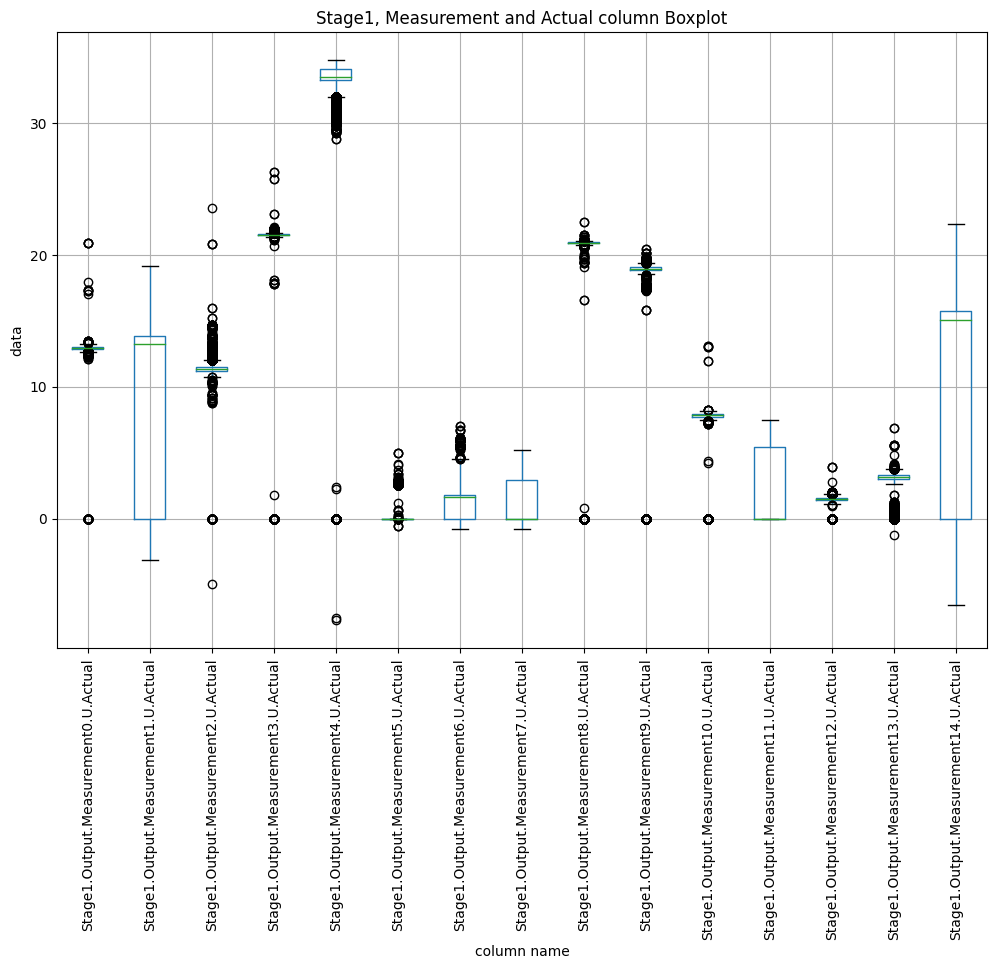

In [10]:
import matplotlib.pyplot as plt
# Stage1, Measurement 및 Actual이 포함된 열을 선택
stage1_measurement_actual_cols = [col for col in df.columns if 'Stage1' in col and 'Measurement' in col and 'Actual' in col]

# 데이터프레임에서 해당 열만 추출
stage1_measurement_actual_data = df[stage1_measurement_actual_cols]

# 그래프 설정
plt.figure(figsize=(12, 8))
plt.title('Stage1, Measurement and Actual column Boxplot')
plt.xlabel('column name')
plt.ylabel('data')

# Boxplot 그리기
stage1_measurement_actual_data.boxplot(rot=90)  # 열 이름을 90도 회전하여 표시


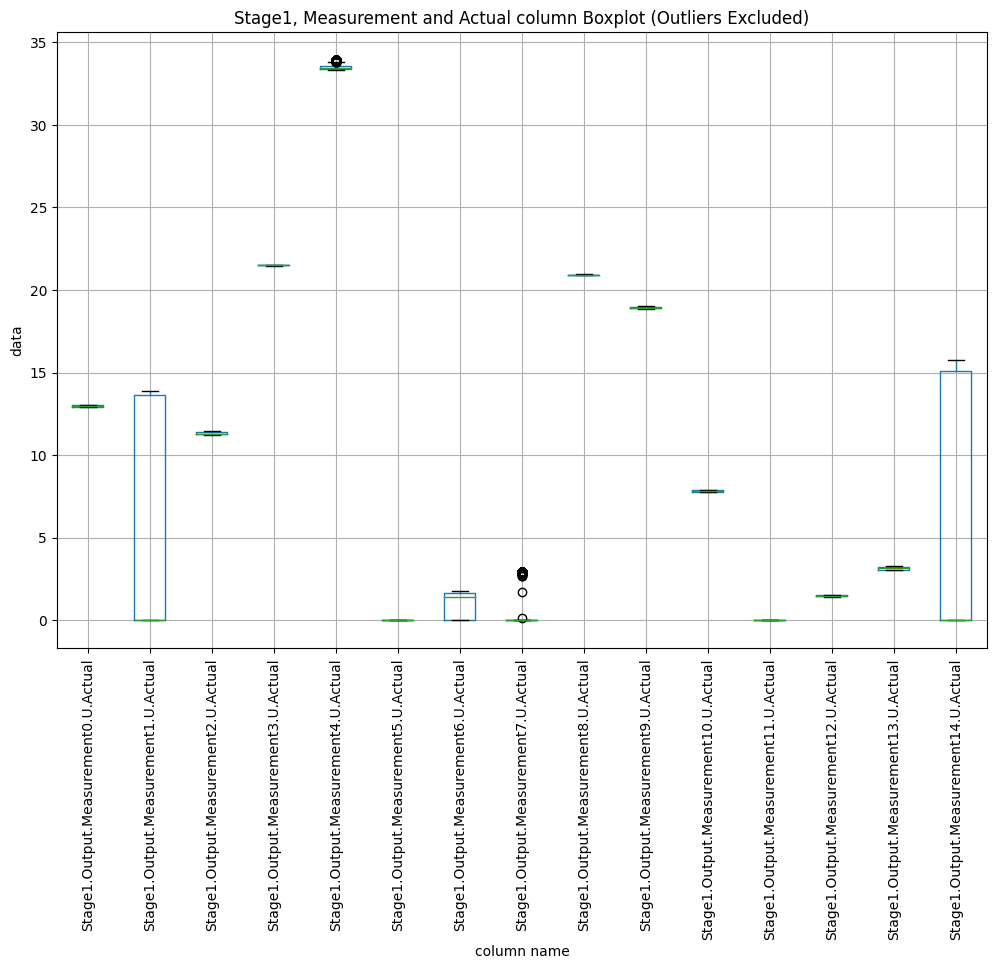

In [11]:
# Stage1, Measurement 및 Actual이 포함된 열을 선택
stage1_measurement_actual_cols = [col for col in df.columns if 'Stage1' in col and 'Measurement' in col and 'Actual' in col]

# 데이터프레임에서 해당 열만 추출
stage1_measurement_actual_data = df[stage1_measurement_actual_cols]

# 데이터 정렬
sorted_data = stage1_measurement_actual_data.apply(sorted, axis=0)

# 이상치의 상하 30%를 제외한 범위 계산
lower_quantile = sorted_data.quantile(0.3)
upper_quantile = sorted_data.quantile(0.7)

# 제외할 이상치 범위 설정
outlier_mask = (stage1_measurement_actual_data >= lower_quantile) & (stage1_measurement_actual_data <= upper_quantile)

# 이상치를 제외한 데이터로 boxplot 그리기
plt.figure(figsize=(12, 8))
plt.title('Stage1, Measurement and Actual column Boxplot (Outliers Excluded)')
plt.xlabel('column name')
plt.ylabel('data')

stage1_measurement_actual_data[outlier_mask].boxplot(rot=90)
plt.show()

<Axes: title={'center': 'Stage1, Measurement and Setpoint column Boxplot'}, xlabel='column name', ylabel='data'>

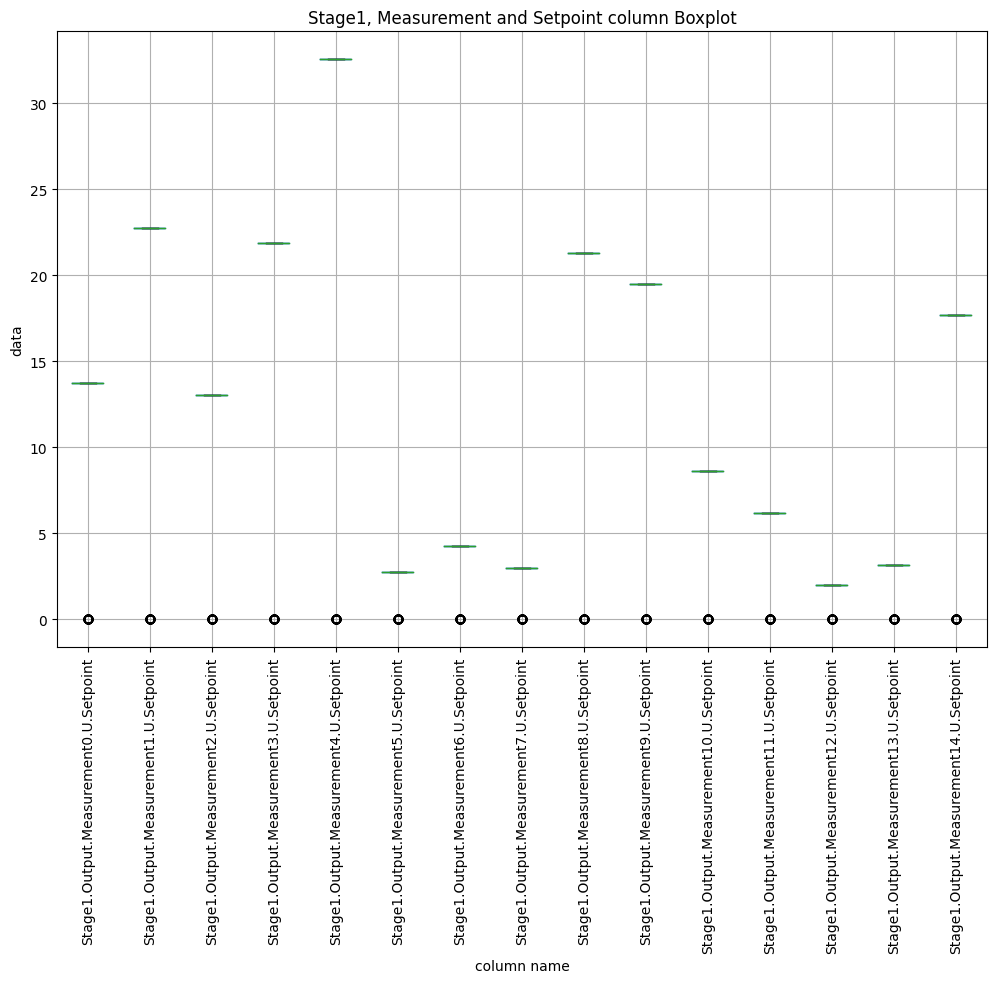

In [69]:
# Stage1, Measurement 및 Setpoint가 포함된 열을 선택
stage1_measurement_actual_cols = [col for col in df.columns if 'Stage1' in col and 'Measurement' in col and 'Setpoint' in col]

# 데이터프레임에서 해당 열만 추출
stage1_measurement_actual_data = df[stage1_measurement_actual_cols]

# 그래프 설정
plt.figure(figsize=(12, 8))
plt.title('Stage1, Measurement and Setpoint column Boxplot')
plt.xlabel('column name')
plt.ylabel('data')

# Boxplot 그리기
stage1_measurement_actual_data.boxplot(rot=90)  # 열 이름을 90도 회전하여 표시


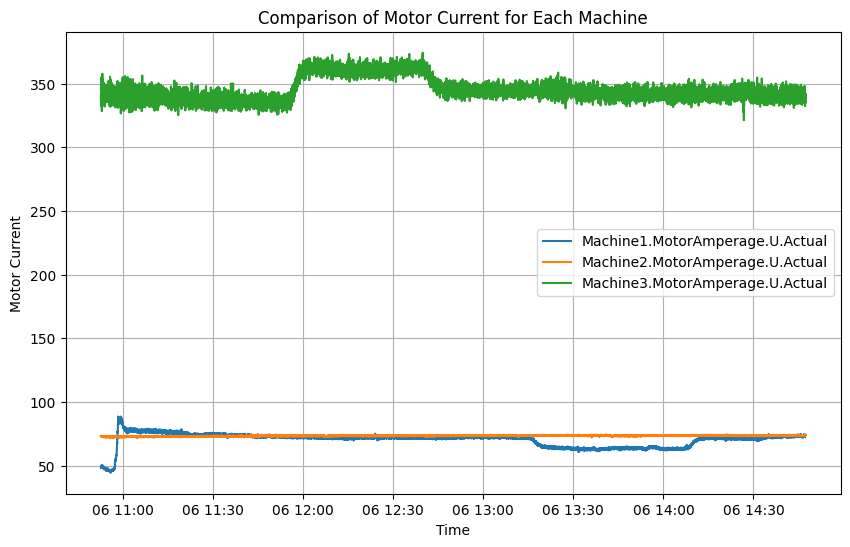

In [13]:
# 'time_stamp' 열을 날짜 형식으로 변환
df['time_stamp'] = pd.to_datetime(df['time_stamp'])

# 데이터프레임으로부터 필요한 열 선택
df_selected = df[['time_stamp', 'Machine1.MotorAmperage.U.Actual', 'Machine2.MotorAmperage.U.Actual', 'Machine3.MotorAmperage.U.Actual']]

# 그래프 설정
plt.figure(figsize=(10, 6))
plt.title('Comparison of Motor Current for Each Machine')
plt.xlabel('Time')
plt.ylabel('Motor Current')

# 각 기계의 모터 전류 그래프 그리기
for column in df_selected.columns[1:]:
    plt.plot(df_selected['time_stamp'], df_selected[column], label=column)

# 범례 표시
plt.legend()

# 결과 출력
plt.grid(True)
plt.show()

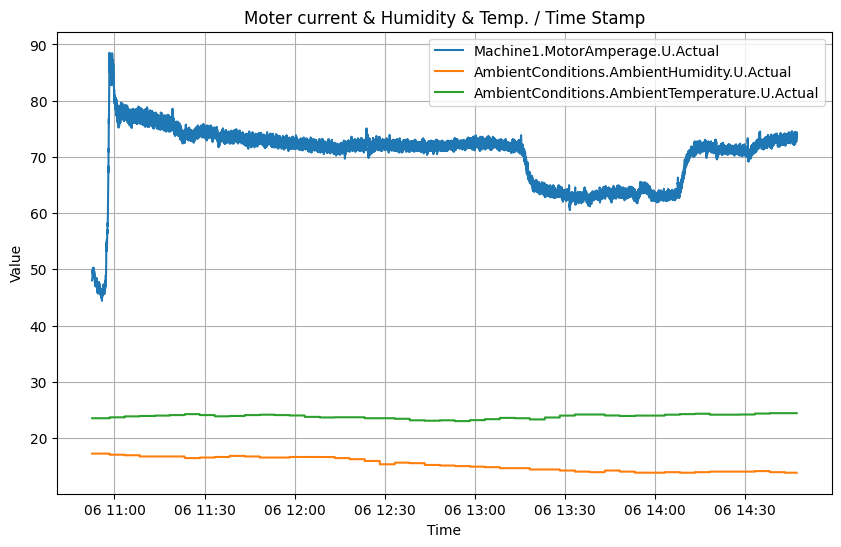

In [45]:
# 'time_stamp' 열을 날짜 형식으로 변환
df['time_stamp'] = pd.to_datetime(df['time_stamp'])

# 데이터프레임으로부터 필요한 열 선택
df_selected = df[['time_stamp', 'Machine1.MotorAmperage.U.Actual','AmbientConditions.AmbientHumidity.U.Actual','AmbientConditions.AmbientTemperature.U.Actual']]

# 그래프 설정
plt.figure(figsize=(10, 6))
plt.title('Moter current & Humidity & Temp. / Time Stamp')
plt.xlabel('Time')
plt.ylabel('Value')

# 각 기계의 모터 전류 그래프 그리기
for column in df_selected.columns[1:]:
    plt.plot(df_selected['time_stamp'], df_selected[column], label=column)

# 범례 표시
plt.legend()

# 결과 출력
plt.grid(True)
plt.show()

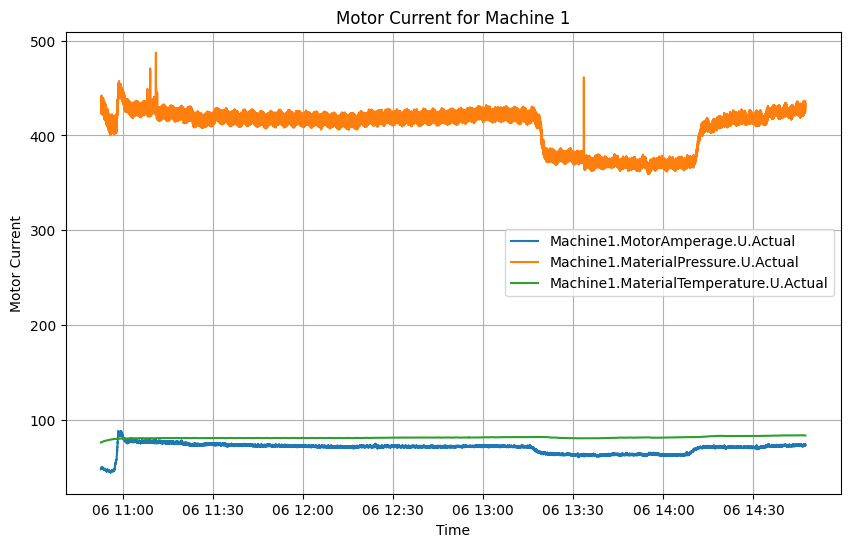

In [40]:
# 'time_stamp' 열을 날짜 형식으로 변환
df['time_stamp'] = pd.to_datetime(df['time_stamp'])

# 데이터프레임으로부터 필요한 열 선택
df_selected = df[['time_stamp', 'Machine1.MotorAmperage.U.Actual','Machine1.MaterialPressure.U.Actual', 'Machine1.MaterialTemperature.U.Actual']]

# 그래프 설정
plt.figure(figsize=(10, 6))
plt.title('Motor Current for Machine 1')
plt.xlabel('Time')
plt.ylabel('Motor Current')

# 각 기계의 모터 전류 그래프 그리기
for column in df_selected.columns[1:]:
    plt.plot(df_selected['time_stamp'], df_selected[column], label=column)

# 범례 표시
plt.legend()

# 결과 출력
plt.grid(True)
plt.show()

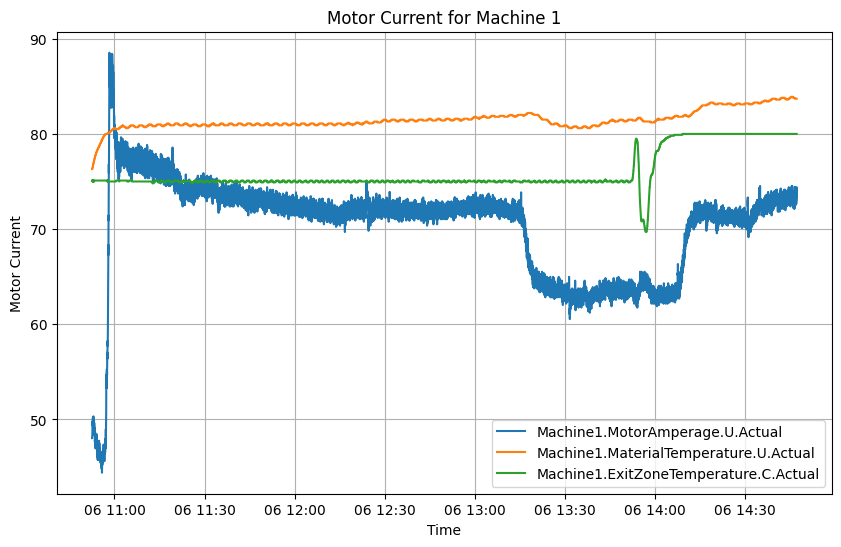

In [42]:
# 'time_stamp' 열을 날짜 형식으로 변환
df['time_stamp'] = pd.to_datetime(df['time_stamp'])

# 데이터프레임으로부터 필요한 열 선택
df_selected = df[['time_stamp', 'Machine1.MotorAmperage.U.Actual', 'Machine1.MaterialTemperature.U.Actual','Machine1.ExitZoneTemperature.C.Actual']]

# 그래프 설정
plt.figure(figsize=(10, 6))
plt.title('Motor Current for Machine 1')
plt.xlabel('Time')
plt.ylabel('Motor Current')

# 각 기계의 모터 전류 그래프 그리기
for column in df_selected.columns[1:]:
    plt.plot(df_selected['time_stamp'], df_selected[column], label=column)

# 범례 표시
plt.legend()

# 결과 출력
plt.grid(True)
plt.show()

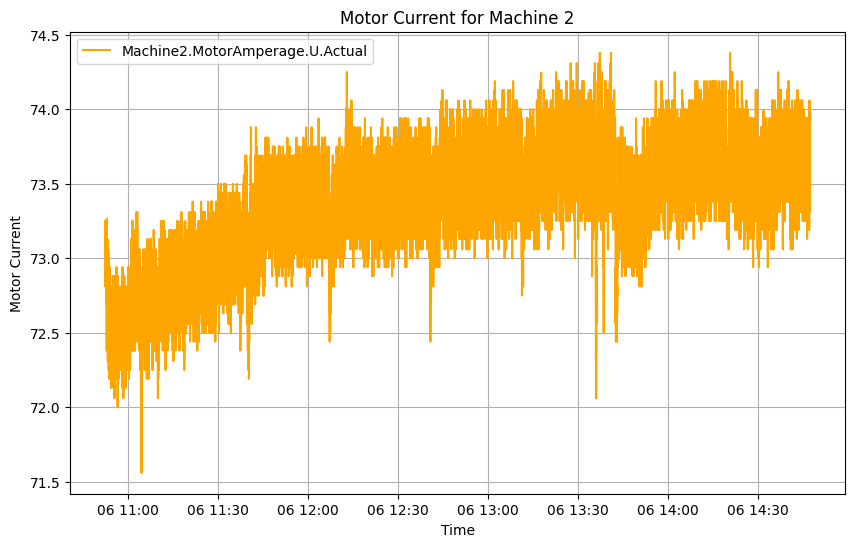

In [15]:
# 'time_stamp' 열을 날짜 형식으로 변환
df['time_stamp'] = pd.to_datetime(df['time_stamp'])

# 데이터프레임으로부터 필요한 열 선택
df_selected = df[['time_stamp', 'Machine2.MotorAmperage.U.Actual']]

# 그래프 설정
plt.figure(figsize=(10, 6))
plt.title('Motor Current for Machine 2')
plt.xlabel('Time')
plt.ylabel('Motor Current')

# 각 기계의 모터 전류 그래프 그리기 (색상: 오렌지)
for column in df_selected.columns[1:]:
    plt.plot(df_selected['time_stamp'], df_selected[column], label=column, color='orange')

# 범례 표시
plt.legend()

# 결과 출력
plt.grid(True)
plt.show()

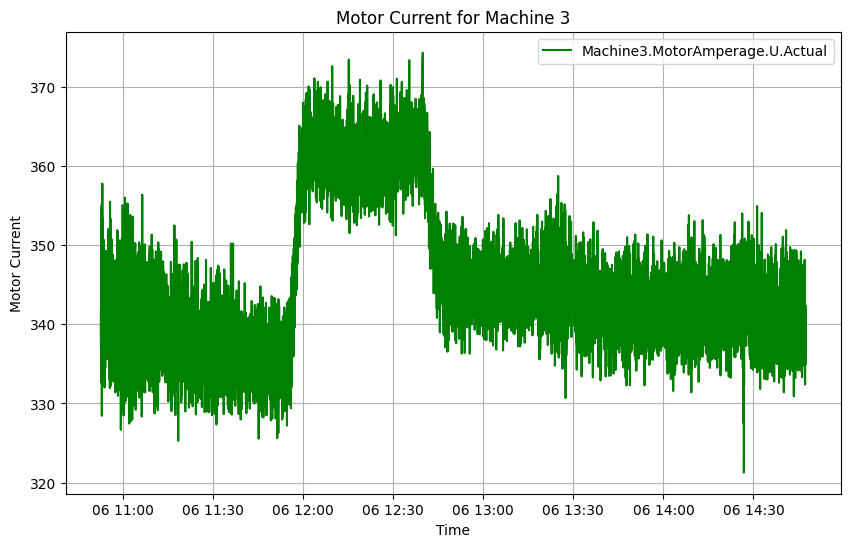

In [16]:
# 'time_stamp' 열을 날짜 형식으로 변환
df['time_stamp'] = pd.to_datetime(df['time_stamp'])

# 데이터프레임으로부터 필요한 열 선택
df_selected = df[['time_stamp', 'Machine3.MotorAmperage.U.Actual']]

# 그래프 설정
plt.figure(figsize=(10, 6))
plt.title('Motor Current for Machine 3')
plt.xlabel('Time')
plt.ylabel('Motor Current')

# 각 기계의 모터 전류 그래프 그리기 (색상: 초록)
for column in df_selected.columns[1:]:
    plt.plot(df_selected['time_stamp'], df_selected[column], label=column, color='Green')

# 범례 표시
plt.legend()

# 결과 출력
plt.grid(True)
plt.show()

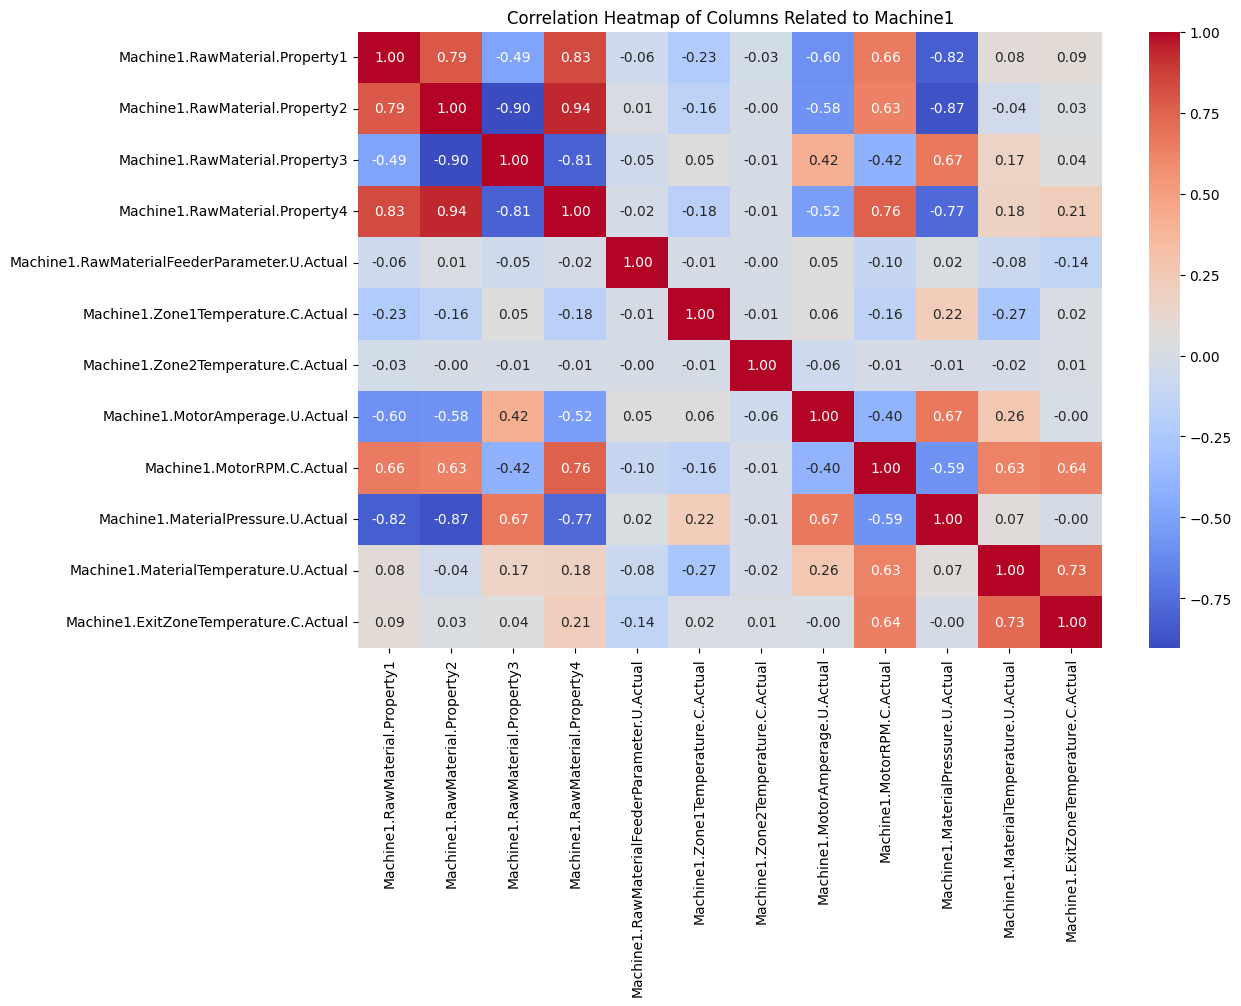

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# "Machine1"이라는 단어가 포함된 모든 열 선택
machine1_columns = [col for col in df.columns if 'Machine1' in col]

# 선택한 열들로 데이터프레임 생성
df_machine1 = df[machine1_columns]

# 상관 행렬 계산
correlation_matrix = df_machine1.corr()

# 히트맵 그리기
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Columns Related to Machine1')
plt.show()

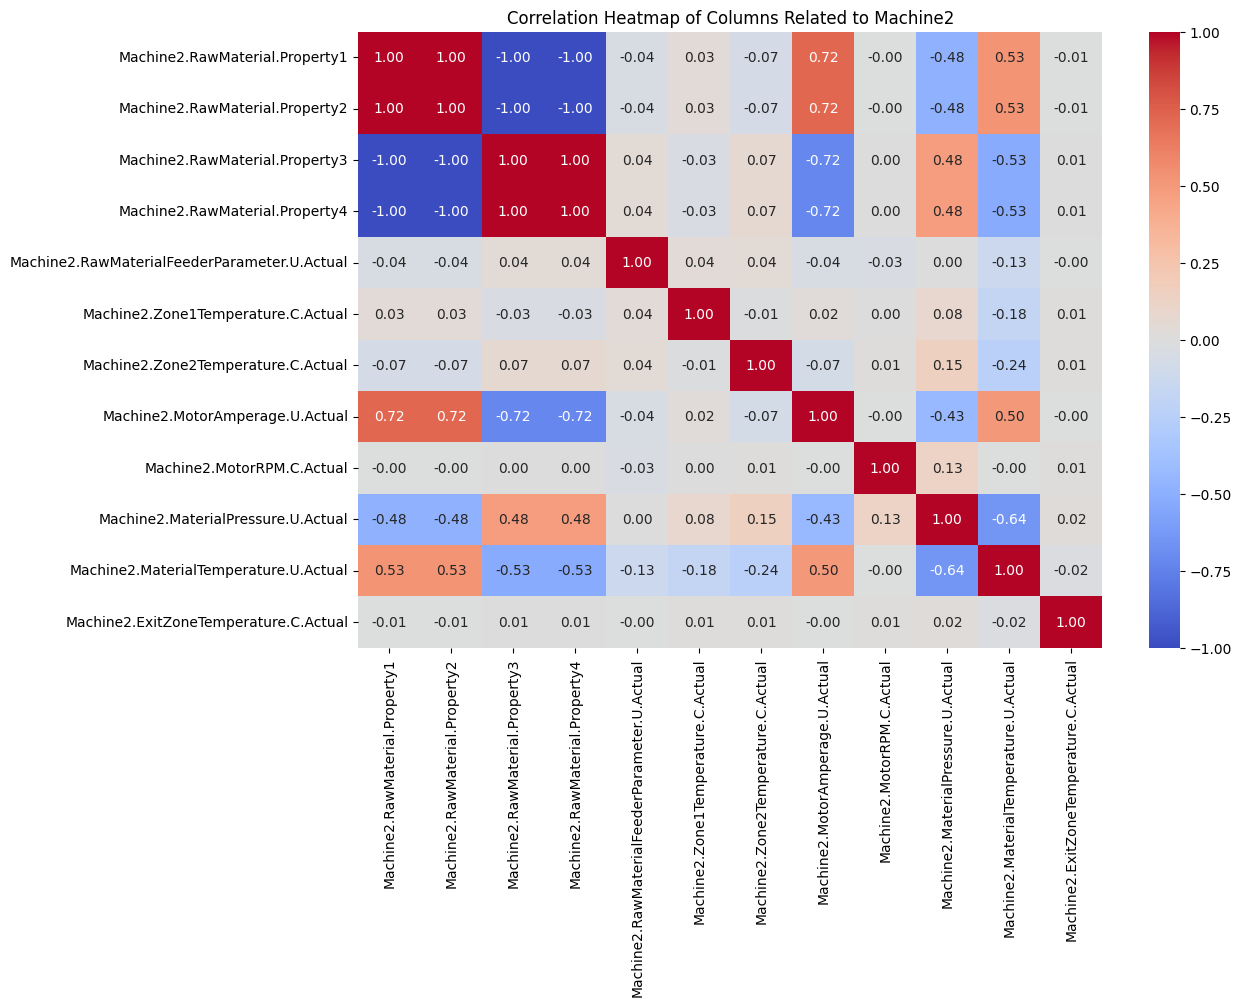

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

# "Machine2"와 관련된 열 선택
machine2_columns = [col for col in df.columns if 'Machine2' in col]

# 선택한 열로 데이터프레임 생성
df_machine2 = df[machine2_columns]

# 상관 행렬 계산
correlation_matrix_machine2 = df_machine2.corr()

# 히트맵 그리기
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix_machine2, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Columns Related to Machine2')
plt.show()


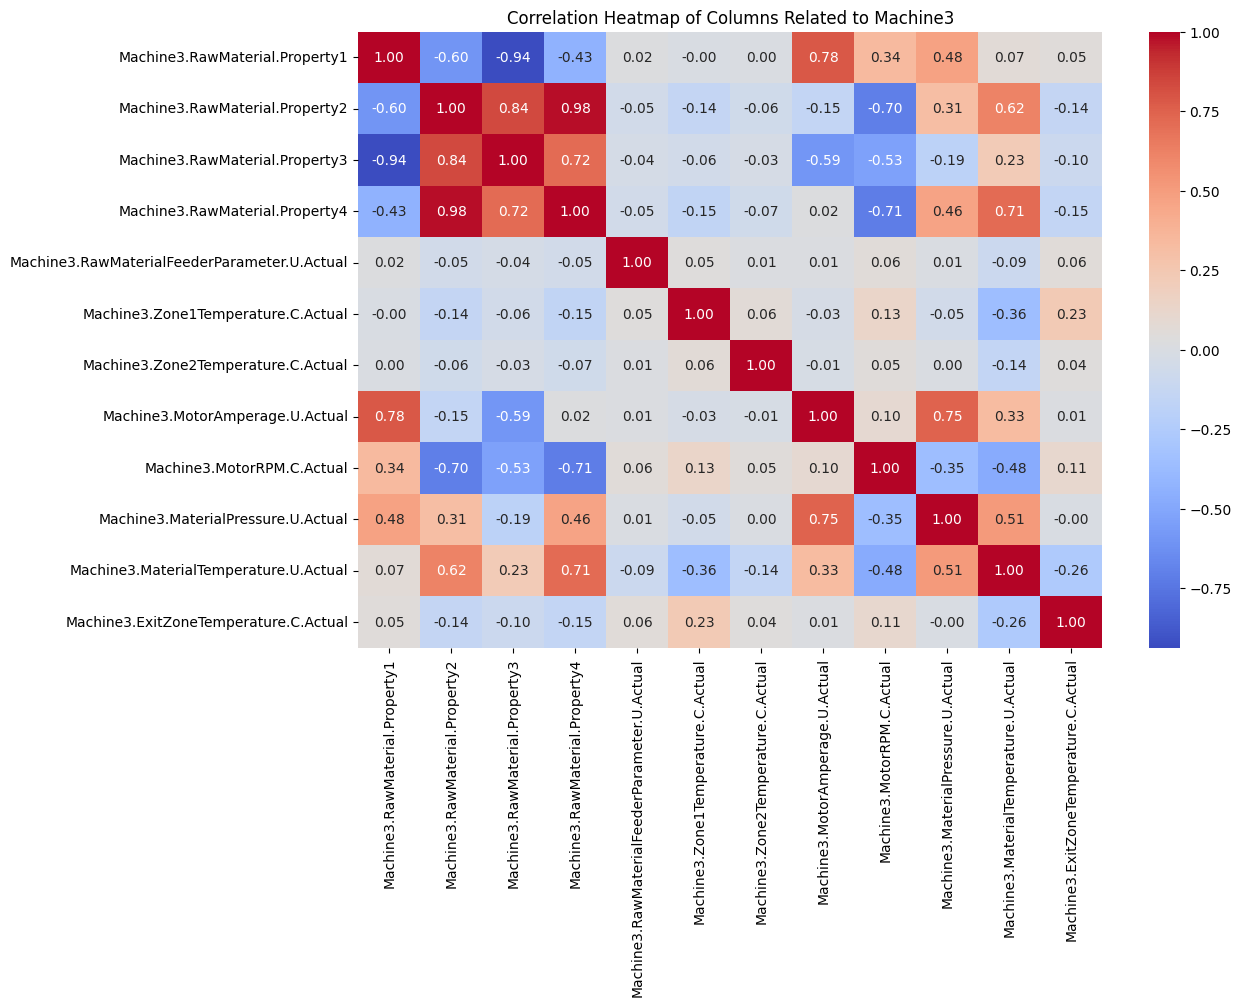

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

# "Machine3"와 관련된 열 선택
machine3_columns = [col for col in df.columns if 'Machine3' in col]

# 선택한 열로 데이터프레임 생성
df_machine3 = df[machine3_columns]

# 상관 행렬 계산
correlation_matrix_machine3 = df_machine3.corr()

# 히트맵 그리기
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix_machine3, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Columns Related to Machine3')
plt.show()


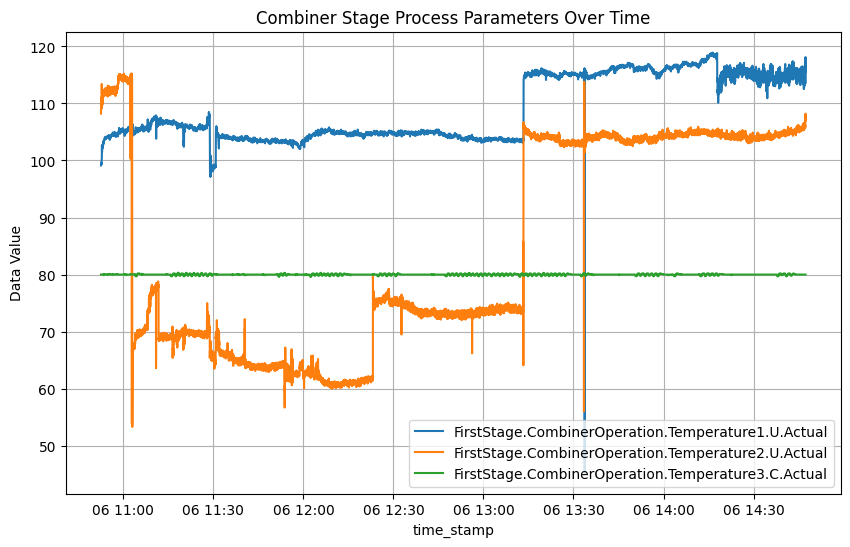

In [20]:
# 'time_stamp' 열을 날짜 형식으로 변환
df['time_stamp'] = pd.to_datetime(df['time_stamp'])

# 39부터 41까지의 열을 슬라이싱
combiner_parameters = df.iloc[:, 39:42]

# 그래프 설정
plt.figure(figsize=(10, 6))
plt.title('Combiner Stage Process Parameters Over Time')
plt.xlabel('time_stamp')
plt.ylabel('Data Value')

# 'time_stamp'을 X 축으로 하여 그래프 그리기
for column in combiner_parameters.columns:
    plt.plot(df['time_stamp'], combiner_parameters[column], label=column)

# 범례 표시
plt.legend()

# 결과 출력
plt.grid(True)
plt.show()

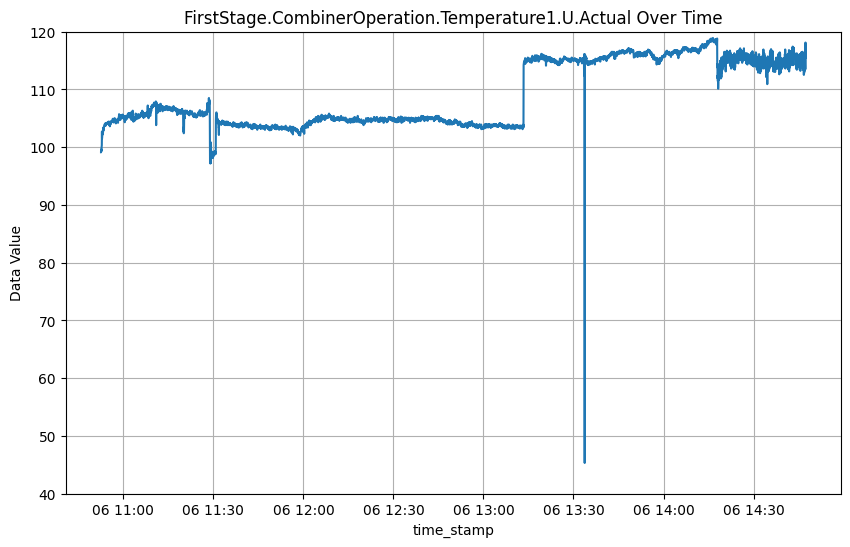

In [21]:
# 'time_stamp' 열을 날짜 형식으로 변환
df['time_stamp'] = pd.to_datetime(df['time_stamp'])

# 필요한 열 선택
selected_column = 'FirstStage.CombinerOperation.Temperature1.U.Actual'

# 그래프 설정
plt.figure(figsize=(10, 6))
plt.title(f'{selected_column} Over Time')
plt.xlabel('time_stamp')
plt.ylabel('Data Value')

# 'time_stamp'을 X 축으로 하여 선택한 열의 데이터를 그래프로 그리기
plt.plot(df['time_stamp'], df[selected_column])

# Y축 범위를 40에서 120으로 제한
plt.ylim(40, 120)

# 결과 출력
plt.grid(True)
plt.show()


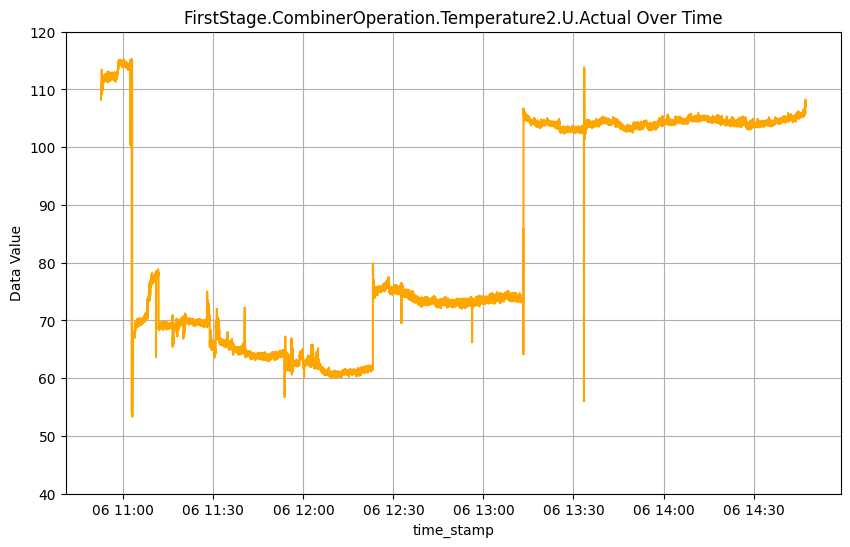

In [22]:
# 'time_stamp' 열을 날짜 형식으로 변환
df['time_stamp'] = pd.to_datetime(df['time_stamp'])

# 필요한 열 선택
selected_column = 'FirstStage.CombinerOperation.Temperature2.U.Actual'

# 그래프 설정
plt.figure(figsize=(10, 6))
plt.title(f'{selected_column} Over Time')
plt.xlabel('time_stamp')
plt.ylabel('Data Value')

# 'time_stamp'을 X 축으로 하여 선택한 열의 데이터를 오렌지 색상의 그래프로 그리기
plt.plot(df['time_stamp'], df[selected_column], color='orange')

# Y축 범위를 40에서 120으로 제한
plt.ylim(40, 120)

# 결과 출력
plt.grid(True)
plt.show()


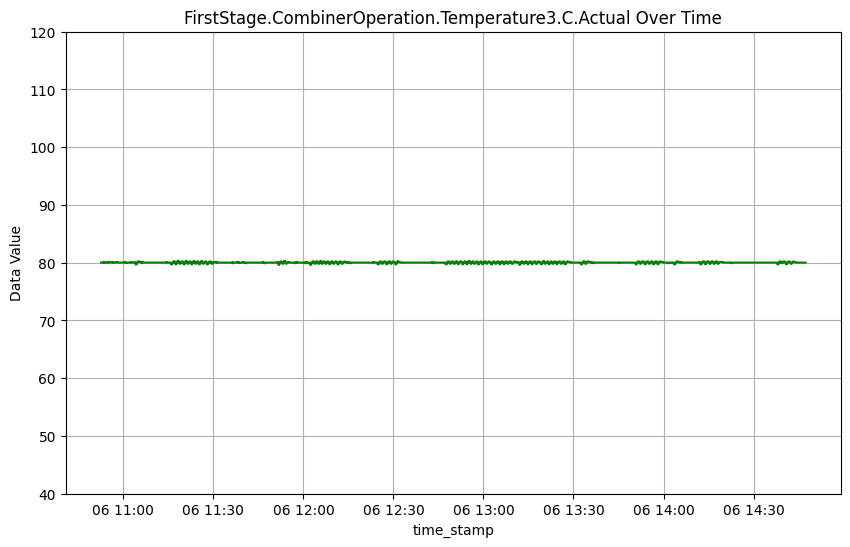

In [23]:
# 'time_stamp' 열을 날짜 형식으로 변환
df['time_stamp'] = pd.to_datetime(df['time_stamp'])

# 필요한 열 선택
selected_column = 'FirstStage.CombinerOperation.Temperature3.C.Actual'

# 그래프 설정
plt.figure(figsize=(10, 6))
plt.title(f'{selected_column} Over Time')
plt.xlabel('time_stamp')
plt.ylabel('Data Value')

# 'time_stamp'을 X 축으로 하여 선택한 열의 데이터를 초록색 그래프로 그리기
plt.plot(df['time_stamp'], df[selected_column], color='Green')

# Y축 범위를 40에서 120으로 제한
plt.ylim(40, 120)

# 결과 출력
plt.grid(True)
plt.show()


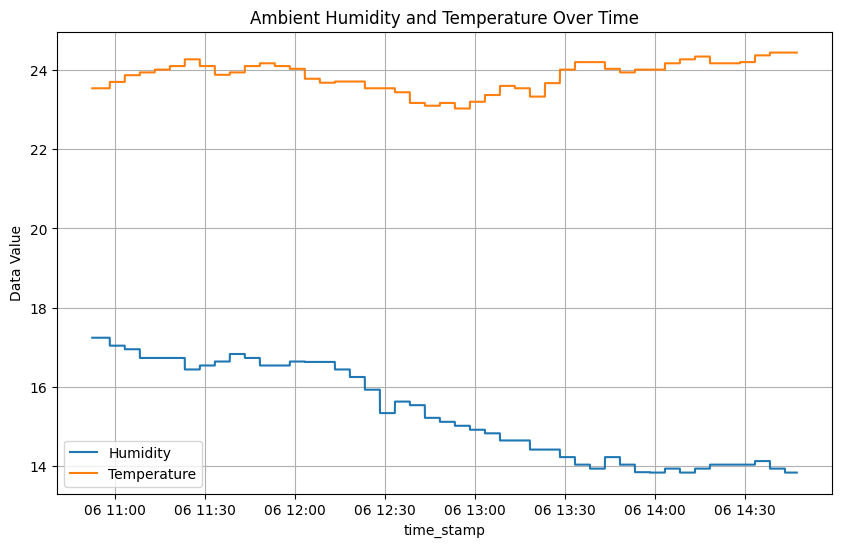

In [24]:
# 'time_stamp' 열을 날짜 형식으로 변환
df['time_stamp'] = pd.to_datetime(df['time_stamp'])

# 'AmbientConditions.AmbientHumidity.U.Actual'과 'AmbientConditions.AmbientTemperature.U.Actual' 열을 선택
selected_columns = ['time_stamp', 'AmbientConditions.AmbientHumidity.U.Actual', 'AmbientConditions.AmbientTemperature.U.Actual']
selected_data = df[selected_columns]

# 그래프 설정
plt.figure(figsize=(10, 6))
plt.title('Ambient Humidity and Temperature Over Time')
plt.xlabel('time_stamp')
plt.ylabel('Data Value')

# 'time_stamp'을 X 축으로 하여 그래프 그리기
plt.plot(selected_data['time_stamp'], selected_data['AmbientConditions.AmbientHumidity.U.Actual'], label='Humidity')
plt.plot(selected_data['time_stamp'], selected_data['AmbientConditions.AmbientTemperature.U.Actual'], label='Temperature')

# 범례 표시
plt.legend()

# 결과 출력
plt.grid(True)
plt.show()

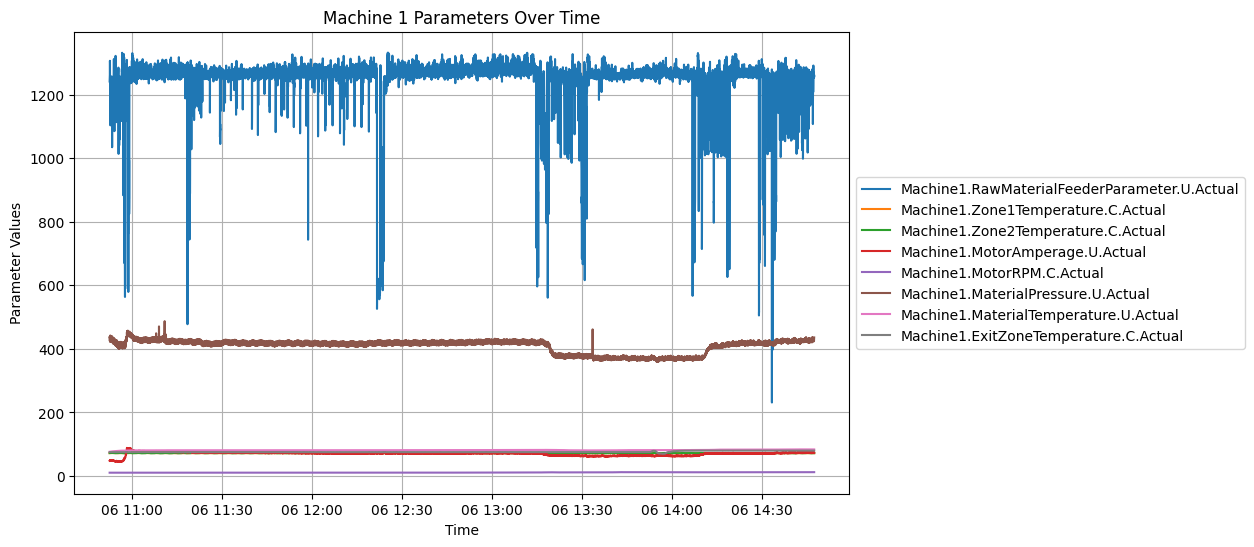

In [25]:
# 'time_stamp' 열을 datetime 형식으로 변환
df['time_stamp'] = pd.to_datetime(df['time_stamp'])

# 선택할 열 이름 리스트
columns = ['Machine1.RawMaterialFeederParameter.U.Actual',
           'Machine1.Zone1Temperature.C.Actual',
           'Machine1.Zone2Temperature.C.Actual',
           'Machine1.MotorAmperage.U.Actual',
           'Machine1.MotorRPM.C.Actual',
           'Machine1.MaterialPressure.U.Actual',
           'Machine1.MaterialTemperature.U.Actual',
           'Machine1.ExitZoneTemperature.C.Actual']


# 그래프 설정
plt.figure(figsize=(10, 6))
plt.title('Machine 1 Parameters Over Time')
plt.xlabel('Time')
plt.ylabel('Parameter Values')

# 각 열별로 그래프 그리기
for column in columns:
    plt.plot(df['time_stamp'], df[column], label=column)

# 범례를 그래프 바깥으로 옮기기
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# 결과 출력
plt.grid(True)
plt.show()


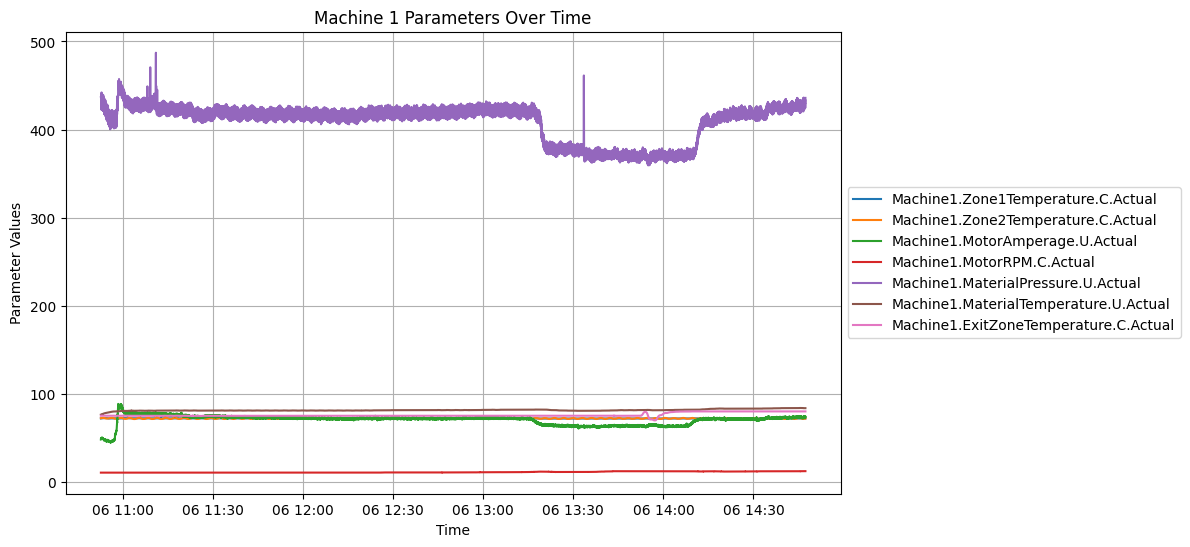

In [26]:
# 'time_stamp' 열을 datetime 형식으로 변환
df['time_stamp'] = pd.to_datetime(df['time_stamp'])

# 선택할 열 이름 리스트
columns = [
           'Machine1.Zone1Temperature.C.Actual',
           'Machine1.Zone2Temperature.C.Actual',
           'Machine1.MotorAmperage.U.Actual',
           'Machine1.MotorRPM.C.Actual',
           'Machine1.MaterialPressure.U.Actual',
           'Machine1.MaterialTemperature.U.Actual',
           'Machine1.ExitZoneTemperature.C.Actual']


# 그래프 설정
plt.figure(figsize=(10, 6))
plt.title('Machine 1 Parameters Over Time')
plt.xlabel('Time')
plt.ylabel('Parameter Values')

# 각 열별로 그래프 그리기
for column in columns:
    plt.plot(df['time_stamp'], df[column], label=column)

# 범례를 그래프 바깥으로 옮기기
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# 결과 출력
plt.grid(True)
plt.show()


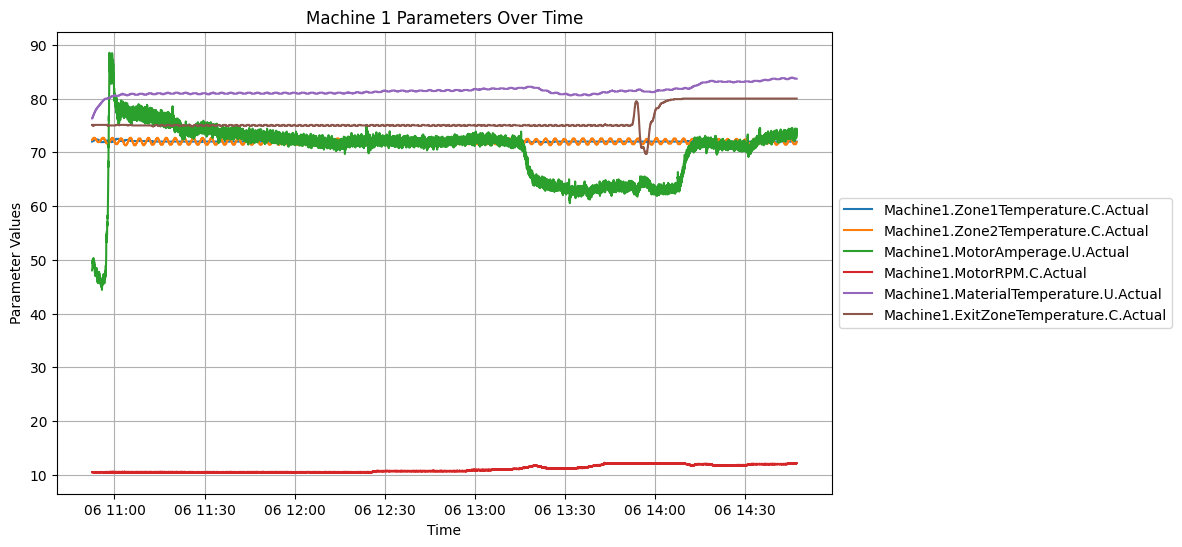

In [27]:
# 'time_stamp' 열을 datetime 형식으로 변환
df['time_stamp'] = pd.to_datetime(df['time_stamp'])

# 선택할 열 이름 리스트
columns = [
           'Machine1.Zone1Temperature.C.Actual',
           'Machine1.Zone2Temperature.C.Actual',
           'Machine1.MotorAmperage.U.Actual',
           'Machine1.MotorRPM.C.Actual',

           'Machine1.MaterialTemperature.U.Actual',
           'Machine1.ExitZoneTemperature.C.Actual']


# 그래프 설정
plt.figure(figsize=(10, 6))
plt.title('Machine 1 Parameters Over Time')
plt.xlabel('Time')
plt.ylabel('Parameter Values')

# 각 열별로 그래프 그리기
for column in columns:
    plt.plot(df['time_stamp'], df[column], label=column)

# 범례를 그래프 바깥으로 옮기기
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# 결과 출력
plt.grid(True)
plt.show()


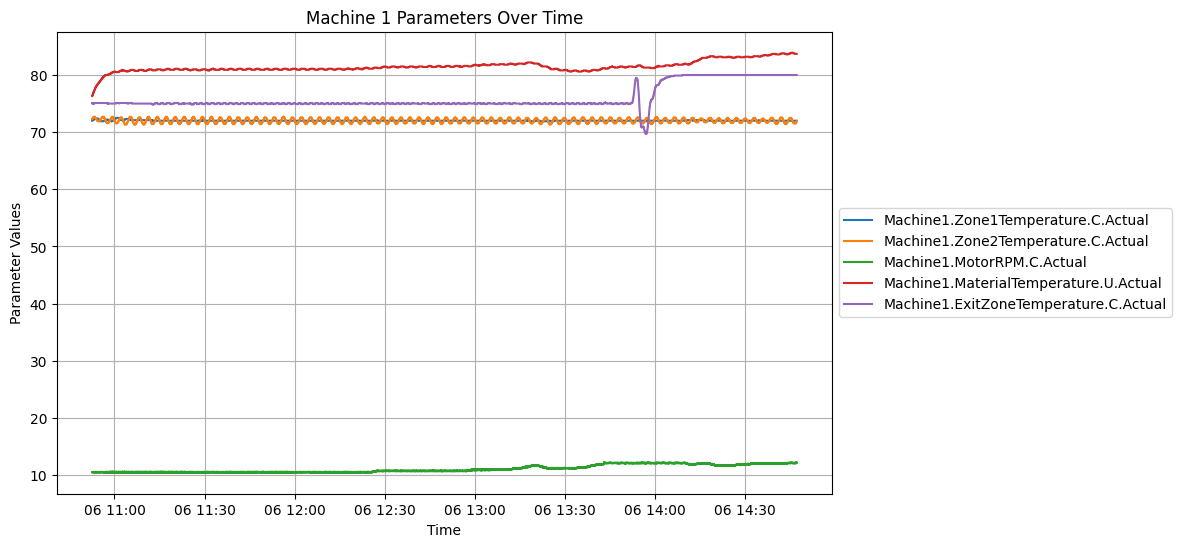

In [28]:
# 'time_stamp' 열을 datetime 형식으로 변환
df['time_stamp'] = pd.to_datetime(df['time_stamp'])

# 선택할 열 이름 리스트
columns = [
           'Machine1.Zone1Temperature.C.Actual',
           'Machine1.Zone2Temperature.C.Actual',

           'Machine1.MotorRPM.C.Actual',

           'Machine1.MaterialTemperature.U.Actual',
           'Machine1.ExitZoneTemperature.C.Actual']


# 그래프 설정
plt.figure(figsize=(10, 6))
plt.title('Machine 1 Parameters Over Time')
plt.xlabel('Time')
plt.ylabel('Parameter Values')

# 각 열별로 그래프 그리기
for column in columns:
    plt.plot(df['time_stamp'], df[column], label=column)

# 범례를 그래프 바깥으로 옮기기
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# 결과 출력
plt.grid(True)
plt.show()


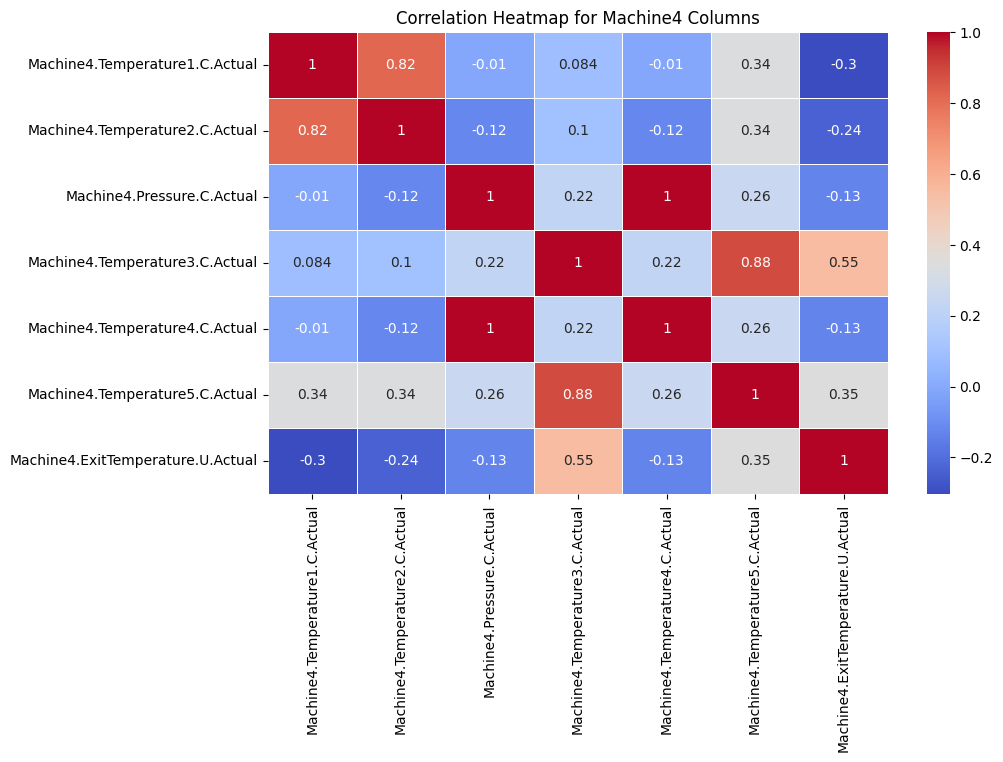

In [29]:
# 'Machine4'가 포함된 열 선택
machine4_columns = [col for col in df.columns if 'Machine4' in col]

# 해당 열들로 데이터프레임 생성
df_machine4 = df[machine4_columns]

# 상관관계 계산
correlation_matrix = df_machine4.corr()

# 히트맵 그리기
plt.figure(figsize=(10, 6))
plt.title('Correlation Heatmap for Machine4 Columns')
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.show()


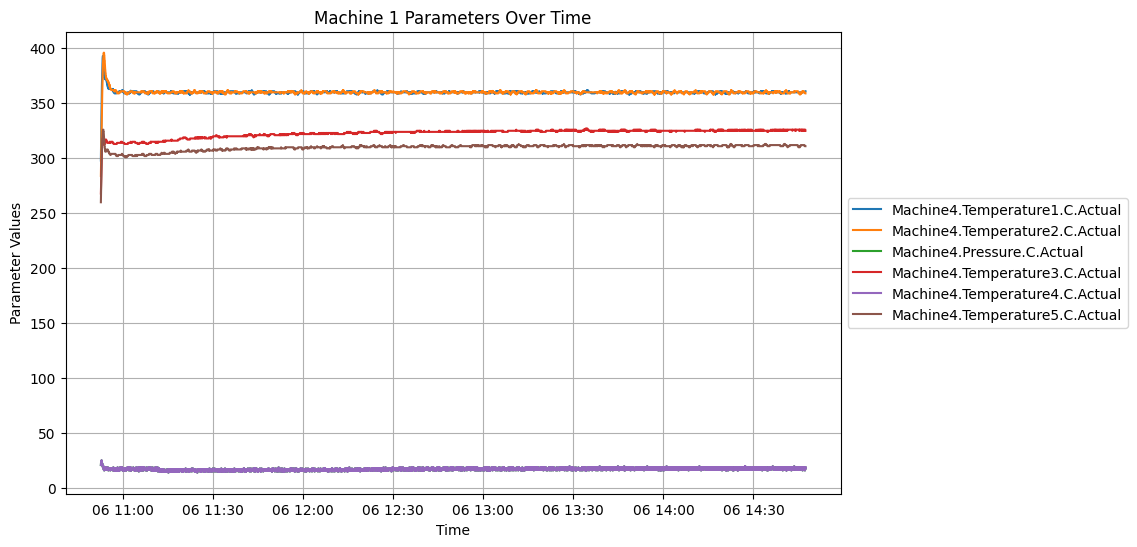

In [68]:
# 'time_stamp' 열을 datetime 형식으로 변환
df['time_stamp'] = pd.to_datetime(df['time_stamp'])

# 선택할 열 이름 리스트
columns = ['Machine4.Temperature1.C.Actual',
 'Machine4.Temperature2.C.Actual',
 'Machine4.Pressure.C.Actual',
 'Machine4.Temperature3.C.Actual',
 'Machine4.Temperature4.C.Actual',
 'Machine4.Temperature5.C.Actual']


# 그래프 설정
plt.figure(figsize=(10, 6))
plt.title('Machine 1 Parameters Over Time')
plt.xlabel('Time')
plt.ylabel('Parameter Values')

# 각 열별로 그래프 그리기
for column in columns:
    plt.plot(df['time_stamp'], df[column], label=column)

# 범례를 그래프 바깥으로 옮기기
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# 결과 출력
plt.grid(True)
plt.show()

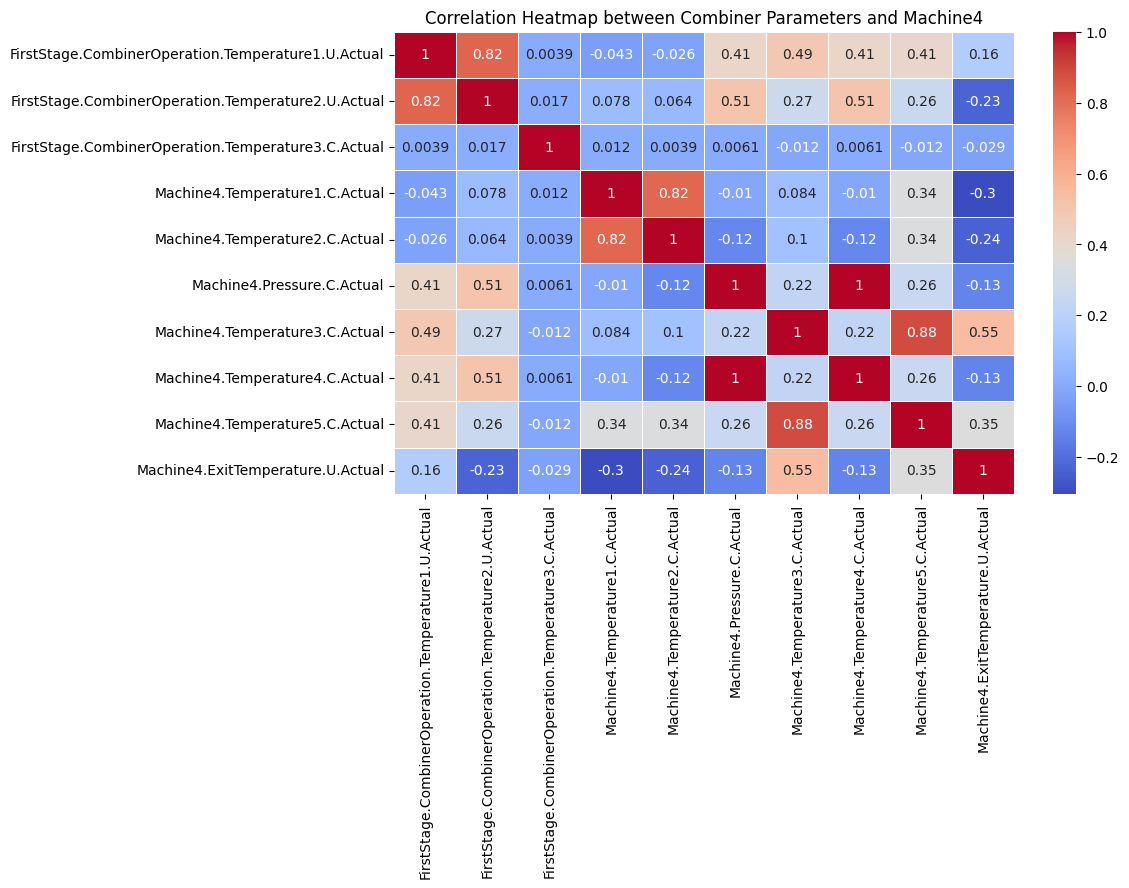

In [30]:
# 'Combiner stage process parameter' 열 선택
combiner_columns = df.columns[df.columns.str.contains('Combiner')]
combiner_parameters = df[combiner_columns]

# 'Machine4' 열 선택
machine4_columns = df.columns[df.columns.str.contains('Machine4')]
machine4_data = df[machine4_columns]

# 두 데이터프레임을 합치기
combined_data = pd.concat([combiner_parameters, machine4_data], axis=1)

# 상관관계 계산
correlation_matrix = combined_data.corr()

# 히트맵 그리기
plt.figure(figsize=(10, 6))
plt.title('Correlation Heatmap between Combiner Parameters and Machine4')
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.show()


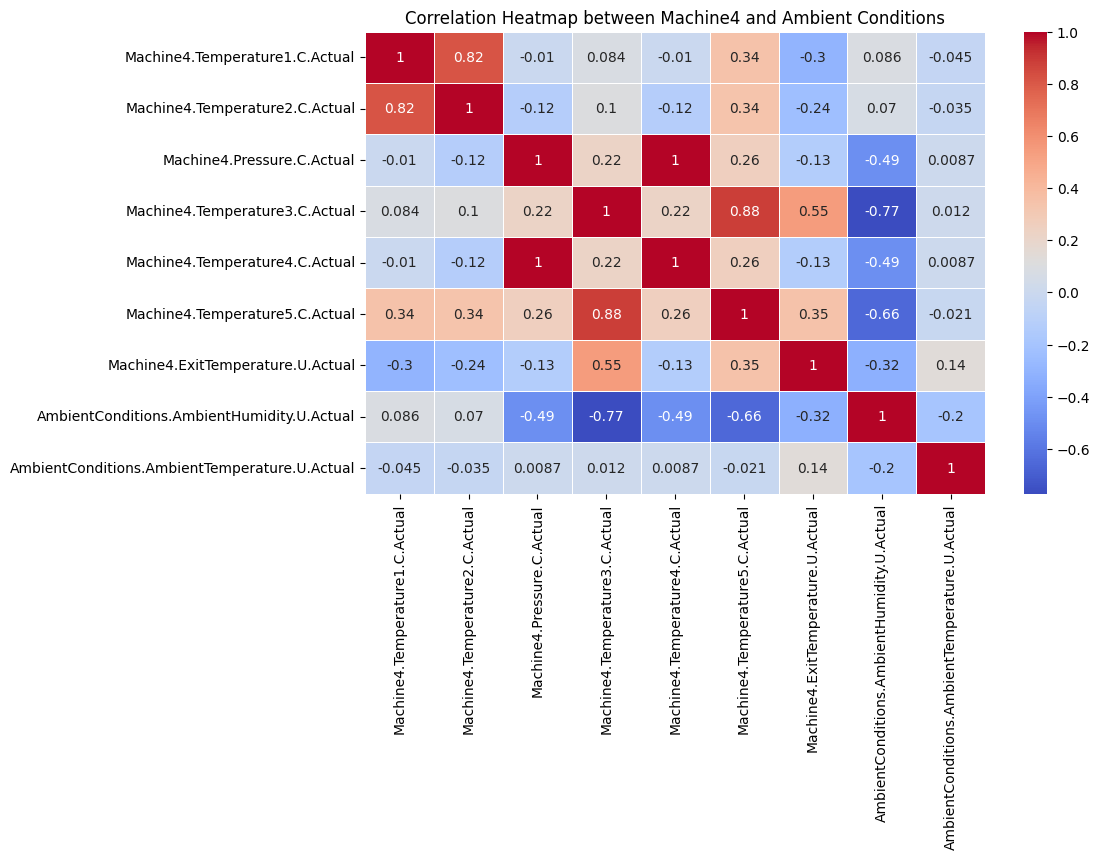

In [31]:
import seaborn as sns

# Machine4가 포함된 모든 열 선택
machine4_related_columns = [col for col in df.columns if 'Machine4' in col] + ['AmbientConditions.AmbientHumidity.U.Actual', 'AmbientConditions.AmbientTemperature.U.Actual']

selected_data = df[machine4_related_columns]

# 상관관계 계산
correlation_matrix = selected_data.corr()

# 히트맵 그리기
plt.figure(figsize=(10, 6))
plt.title('Correlation Heatmap between Machine4 and Ambient Conditions')
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.show()


<Axes: title={'center': 'Stage2, Measurement and Actual column Boxplot'}, xlabel='column name', ylabel='data'>

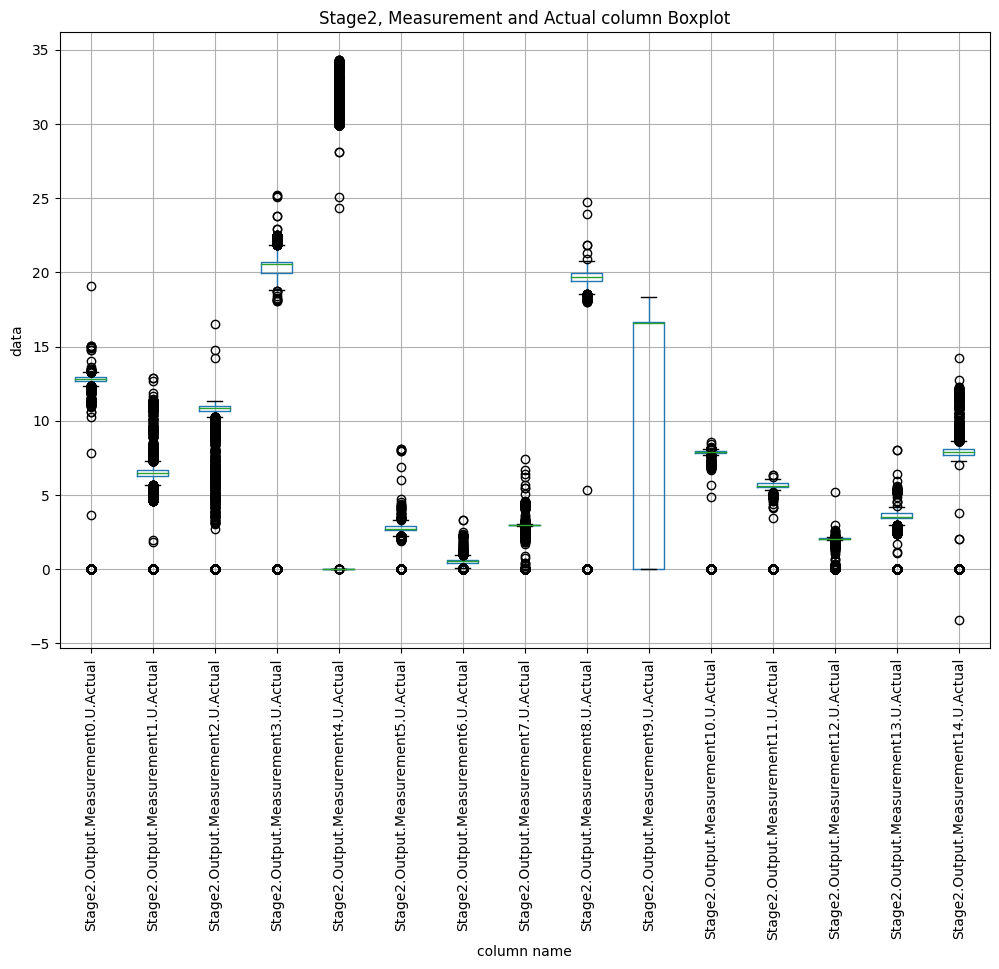

In [32]:
# Stage2, Measurement 및 Actual이 포함된 열을 선택
stage1_measurement_actual_cols = [col for col in df.columns if 'Stage2' in col and 'Measurement' in col and 'Actual' in col]

# 데이터프레임에서 해당 열만 추출
stage1_measurement_actual_data = df[stage1_measurement_actual_cols]

# 그래프 설정
plt.figure(figsize=(12, 8))
plt.title('Stage2, Measurement and Actual column Boxplot')
plt.xlabel('column name')
plt.ylabel('data')

# Boxplot 그리기
stage1_measurement_actual_data.boxplot(rot=90)  # 열 이름을 90도 회전하여 표시


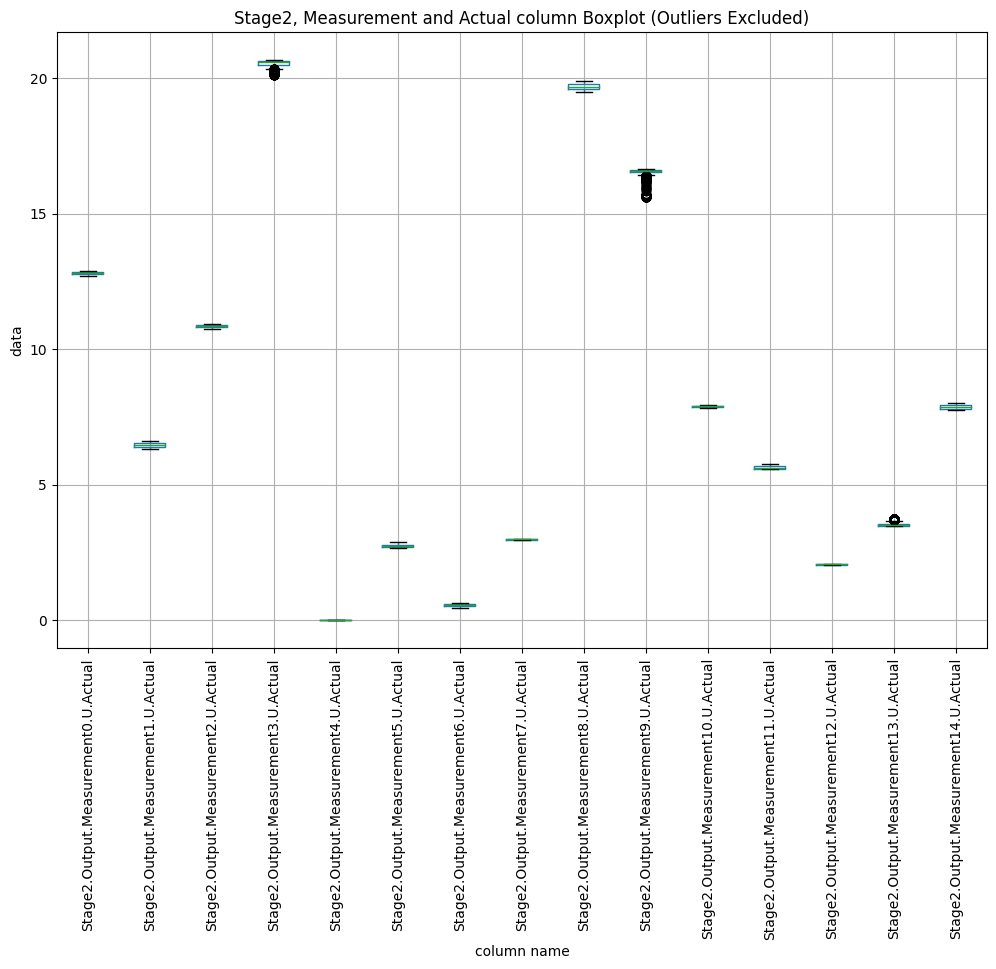

In [33]:
# Stage2, Measurement 및 Actual이 포함된 열을 선택
stage1_measurement_actual_cols = [col for col in df.columns if 'Stage2' in col and 'Measurement' in col and 'Actual' in col]

# 데이터프레임에서 해당 열만 추출
stage1_measurement_actual_data = df[stage1_measurement_actual_cols]

# 데이터 정렬
sorted_data = stage1_measurement_actual_data.apply(sorted, axis=0)

# 이상치의 상하 30%를 제외한 범위 계산
lower_quantile = sorted_data.quantile(0.3)
upper_quantile = sorted_data.quantile(0.7)

# 제외할 이상치 범위 설정
outlier_mask = (stage1_measurement_actual_data >= lower_quantile) & (stage1_measurement_actual_data <= upper_quantile)

# 이상치를 제외한 데이터로 boxplot 그리기
plt.figure(figsize=(12, 8))
plt.title('Stage2, Measurement and Actual column Boxplot (Outliers Excluded)')
plt.xlabel('column name')
plt.ylabel('data')

stage1_measurement_actual_data[outlier_mask].boxplot(rot=90)
plt.show()

<Axes: title={'center': 'Stage2, Measurement and Actual column Boxplot'}, xlabel='column name', ylabel='data'>

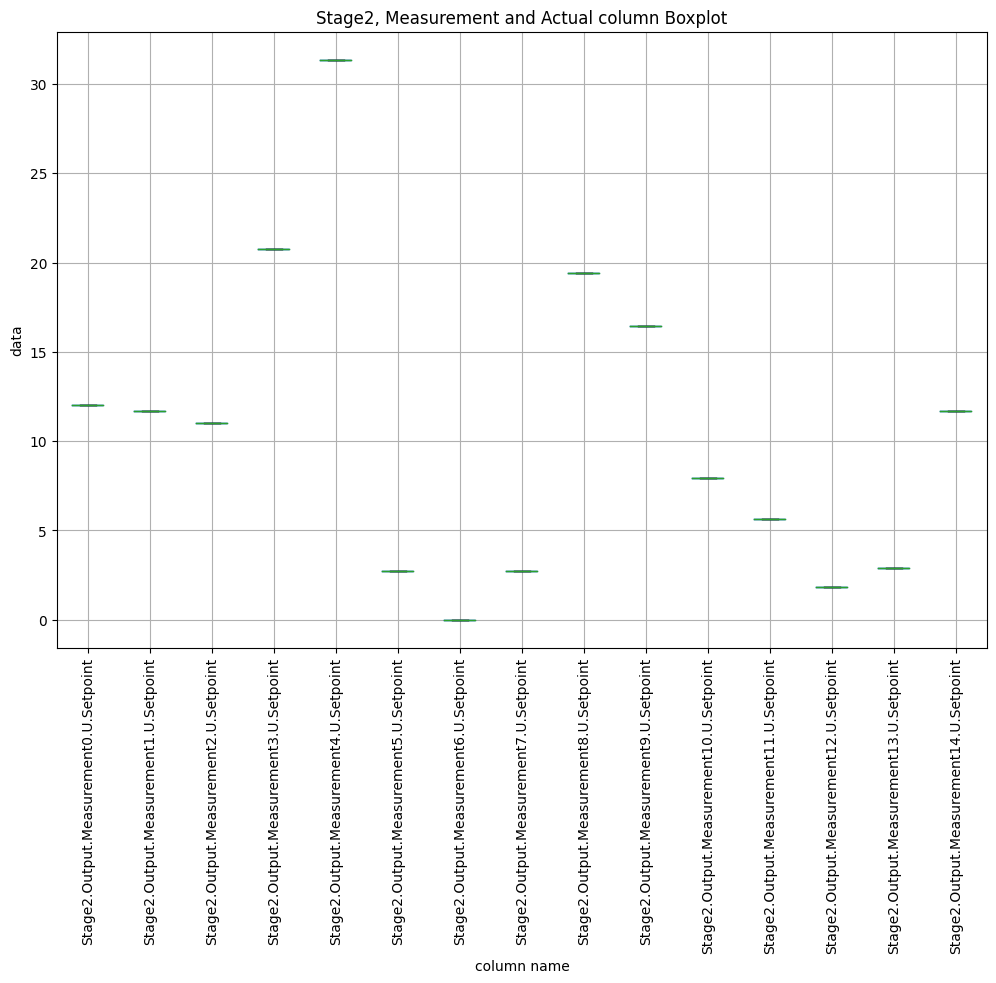

In [34]:
# Stage2, Measurement 및 Setpoint가 포함된 열을 선택
stage1_measurement_actual_cols = [col for col in df.columns if 'Stage2' in col and 'Measurement' in col and 'Setpoint' in col]

# 데이터프레임에서 해당 열만 추출
stage1_measurement_actual_data = df[stage1_measurement_actual_cols]

# 그래프 설정
plt.figure(figsize=(12, 8))
plt.title('Stage2, Measurement and Actual column Boxplot')
plt.xlabel('column name')
plt.ylabel('data')

# Boxplot 그리기
stage1_measurement_actual_data.boxplot(rot=90)  # 열 이름을 90도 회전하여 표시